In [1]:
! git clone https://github.com/mabhay3420/Deep-Into-CNN.git

fatal: destination path 'Deep-Into-CNN' already exists and is not an empty directory.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

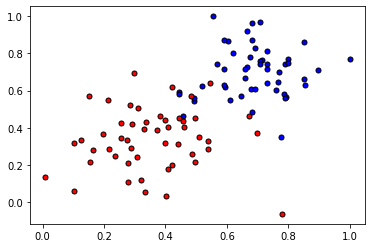

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [55]:
data = pd.read_csv('Deep-Into-CNN/W2-3/NeuralNetIntro/gradient-descent/data.csv', header = None)
X = np.array(data[[0,1]])
y = np.array((data[2]))
plot_points(X,y)
plt.show()


In [69]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def output_formula(features, weights, bias):
  return sigmoid(np.dot(features,weights) + bias)

def error_formula(y, output):
    return -y*np.log(output) - (1-y)*np.log(1 - output)

def update_weights(x, y, weights, bias, learnrate):
    bias += learnrate*(y - output_formula(x,weights,bias))
    weights += learnrate*(y - output_formula(x,weights,bias))
    return weights,bias

In [60]:
n_records, n_features = X.shape
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
weights.shape

(2,)

In [67]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            
            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5
            
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.6698339773477209
Accuracy:  0.6

========== Epoch 10 ==========
Train loss:  0.6678900573205115
Accuracy:  0.6

========== Epoch 20 ==========
Train loss:  0.6678799442280782
Accuracy:  0.6

========== Epoch 30 ==========
Train loss:  0.6678784844015115
Accuracy:  0.6

========== Epoch 40 ==========
Train loss:  0.6678770808773016
Accuracy:  0.6

========== Epoch 50 ==========
Train loss:  0.6678756777260044
Accuracy:  0.6

========== Epoch 60 ==========
Train loss:  0.6678742745826711
Accuracy:  0.6

========== Epoch 70 ==========
Train loss:  0.6678728714449207
Accuracy:  0.6

========== Epoch 80 ==========
Train loss:  0.667871468312737
Accuracy:  0.6

========== Epoch 90 ==========
Train loss:  0.667870065186121
Accuracy:  0.6


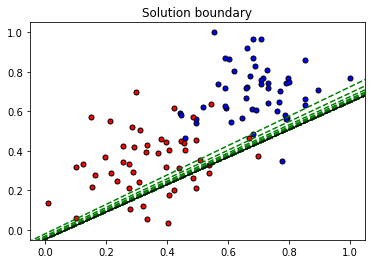

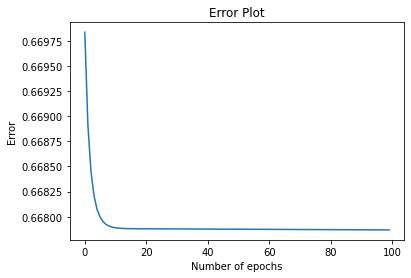

In [70]:
train(X, y, epochs, learnrate, True)